# 🧩 Problem Statement

The objective of this project is to develop a deep learning-based model capable of predicting household appliance energy consumption using multivariate time-series data. The data includes environmental factors (temperature, humidity, wind speed, visibility, etc.), time-based features (day of the week, hour of the day, etc.), and energy-related metrics, all collected at 10-minute intervals over an extended period.

The primary target variable is `Appliances`, representing the total energy consumed by household appliances (in watt-hours). The goal is to accurately forecast future energy usage based on historical patterns and contextual variables.

This problem requires understanding the temporal nature of the data, applying appropriate preprocessing techniques, engineering time-aware features, and building a robust deep learning modelsto capture sequential dependencies and trends.


# 📊 Step 01: Read & Load the dataset

In [204]:
# Install core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Display plots inline(images  or any visualization get displayed)
%matplotlib inline

# Set global visual settings
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [205]:
# Load the dataset
data_path = "../data/raw/energy_data_set.csv"
df = pd.read_csv(data_path)

In [206]:
# Display the first few rows
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [207]:
# Display the last few rows
df.tail()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [208]:
# check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [209]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [210]:
df.index

RangeIndex(start=0, stop=19735, step=1)

In [211]:
# Check for missing values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [212]:
# Descriptive statictics
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [213]:
# check shape of the Data Frame
df.shape

(19735, 29)

In [214]:
# Quick stats
#df.describe().T

In [215]:
# To check data types
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

# 📊 Step 2: EDA – Before Feature Engineering

We begin by analyzing the raw dataset to understand how energy consumption behaves over time and with different environmental features.

These plots help us understand the distribution, outliers, and feature relationships in the raw dataset before any feature extraction or transformation is applied.


In [216]:
# View column names and structure
print("Shape:", df.shape)
print("Columns:\n", df.columns.tolist())
df.head(2)

Shape: (19735, 29)
Columns:
 ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


## Temporal plot / Line Plot: Appliances Energy Consumption Over Time

In [217]:
# convert the 'date' column into datetime format
df['date'] = pd.to_datetime(df['date'])

In [218]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [219]:
# Set 'date' column as the DataFrame index
df.set_index('date', inplace=True)

In [220]:
df.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

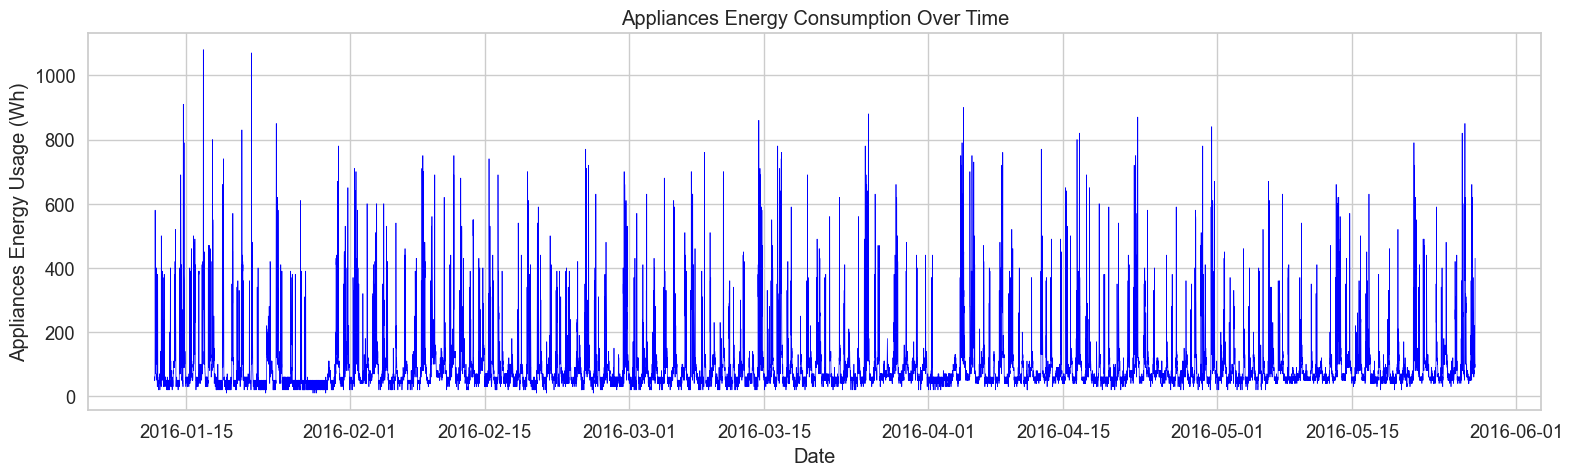

In [221]:
# Temporal plot: Appliances Energy Consumption Over Time
plt.figure(figsize=(16, 5))
plt.plot(df.index, df['Appliances'], color='blue', linewidth=0.5)
plt.title('Appliances Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Appliances Energy Usage (Wh)')
plt.tight_layout()

### 🧠 What This Plot Shows

- X-axis: date (timestamps, collected every 10 minutes)

- Y-axis: Appliances (energy consumption in watt-hours)

- Line: Change in energy usage over time

### 🔍 Observation: Appliance Energy Consumption Over Time

- The line plot shows how appliance energy usage changes over time, with data sampled every 10 minutes.

- The energy consumption data shows strong **daily seasonality**, with repeating peaks likely corresponding to high-usage times (morning and evening).

- There are periods of low usage (possibly during sleep or absence).

- Some very **high spikes** in energy usage may indicate the use of multiple heavy appliances simultaneously.

- No significant upward or downward **long-term trend** is visible.

- These patterns suggest that **time-based features** (like hour of day or weekday/weekend) could be strong predictors in the forecasting model.


## Autocorrelation Plot

Shows how much current energy  use depends on previous values(lags)

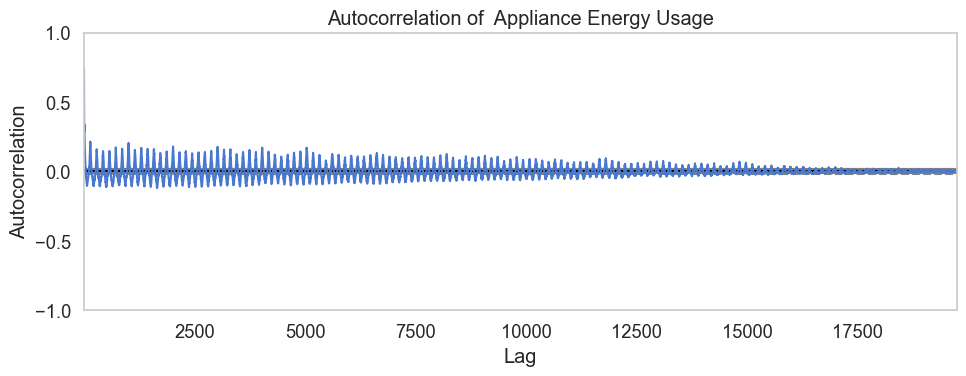

In [222]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 4))
autocorrelation_plot(df['Appliances'])
plt.title("Autocorrelation of  Appliance Energy Usage")
plt.tight_layout()

### 🧠 What it shows:
- Many repeating spikes (waves) in the plot.

- High autocorrelation at small lags, but you also see regular patterns throughout the plot.

- These regular waves correspond to seasonality (daily/weekly cycles).

### 🔍 Observation:

- The autocorrelation plot over the entire dataset reveals s**trong seasonality** in appliance energy usage, as indicated by the regular, repeating peaks.

- This suggests energy usage follows daily or weekly cycles.

- **Recent values are still most predictive**, but the repeating pattern indicates that “the same time yesterday” or “last week” also have predictive power.

- Using lagged features (previous values) and capturing seasonality will be important in modeling / forecasting.

## Boxplot for Outlier Detection

Boxplot is a way to visualize the spread (distribution) of a single variable—in this case, appliance energy usage (Wh).

Text(0.5, 0, 'Energy (Wh)')

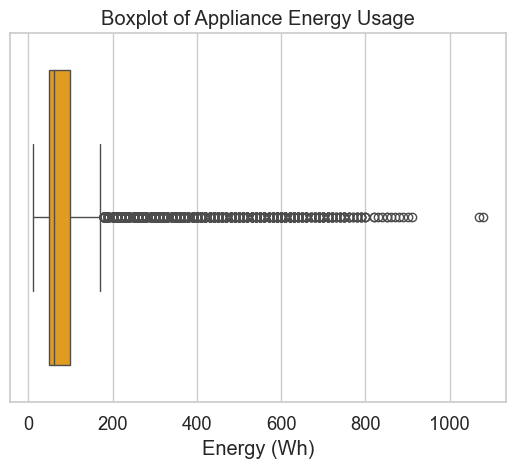

In [223]:
plt.Figure(figsize=(10, 1))
sns.boxplot(x=df['Appliances'], color='orange')
plt.title("Boxplot of Appliance Energy Usage")
plt.xlabel("Energy (Wh)")

### 🧠 What This Plot Shows

#### Boxplot – Outliers in Appliance Energy Usage

A boxplot helps us understand:

    - Where most values lie

    - What’s considered normal

    - Which values are outliers (unusual, very high or very low)

🟧 Orange Box:
    - This is where the middle 50% of energy values are (called the IQR – Interquartile Range)

Horizontal Line inside box:
    - This is the median (middle value)

Whiskers (lines on both sides of box):
    - Range of “normal” values

Dots outside the whiskers:
    -  These are outliers (very high or very low values that don’t fit the pattern)

### 🔍 Observations:

- Most values are between ~50 and 200 Wh.

- The box is narrow, meaning the typical usage doesn’t vary much.

- There are a lot of dots (outliers) on the right side → these are energy readings higher than usual.

- Some of these outliers go above 1000 Wh — these are rare and extreme cases.

##### ✅ What It Means

Our dataset has a lot of normal readings, but also many high spikes in energy usage.

These outliers could be:

    - Real: someone using oven + washer + heater together

    - Noise: sensor error or one-time events

We should consider handling these outliers before training your deep learning model (e.g., scaling, capping, or transformation)


## Correlation Heatmap

A correlation heatmap helps us understand:

    How strongly different variables are related to each other

    Which features might help predict the target (energy usage)

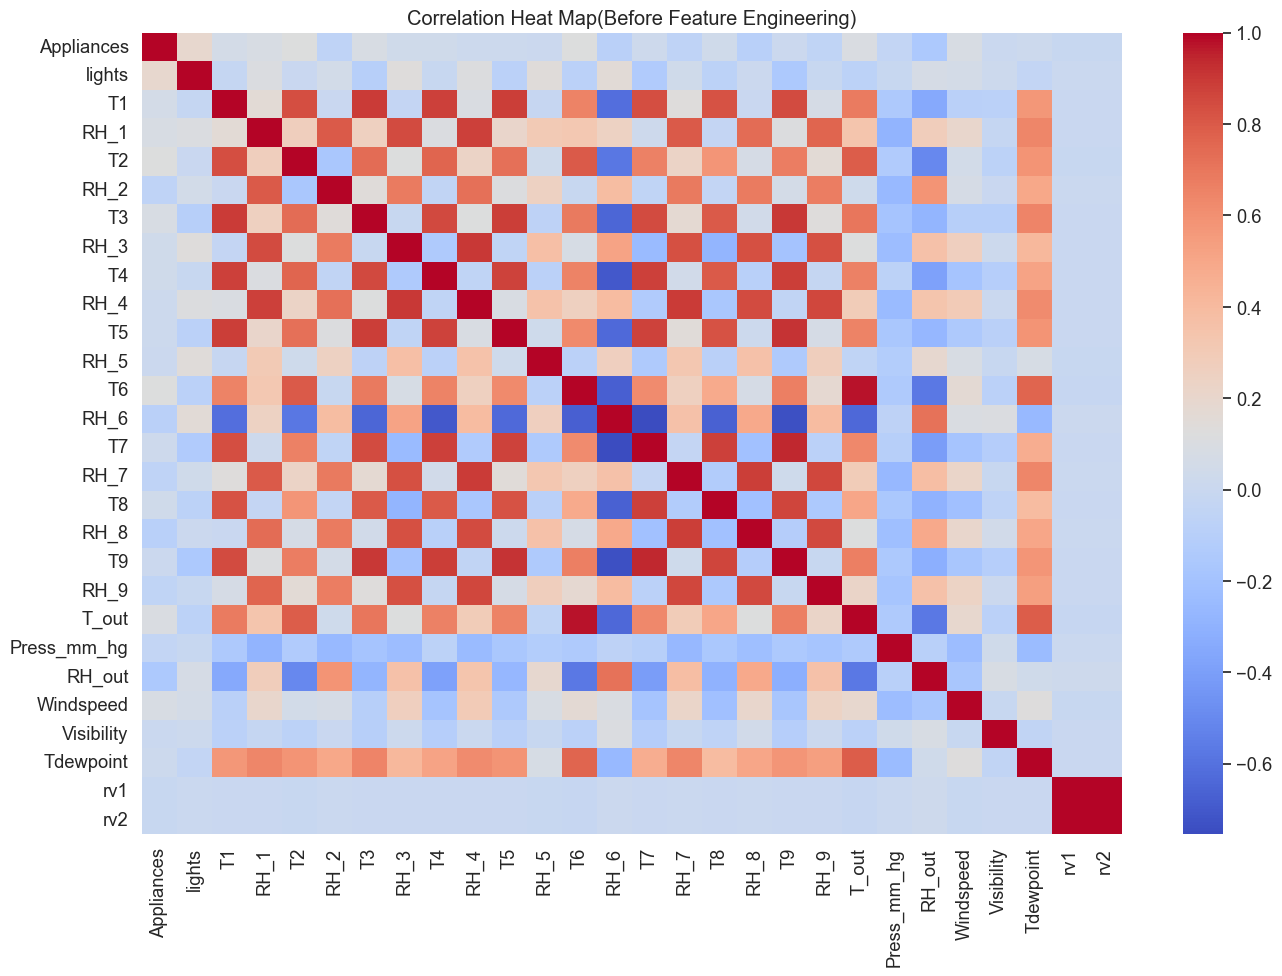

In [224]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heat Map(Before Feature Engineering)")
plt.tight_layout()

### 🧠 What This Plot Shows

### Correlation Heatmap – Raw Numeric Features

- This heatmap displays pairwise correlations between numeric features in the raw dataset.
- Strong positive or negative correlations are shown in deep red/blue.


### 🔍 Observations:

The correlation heatmap shows the strength and direction of relationships between all numeric features.

Most features have a weak to moderate positive correlation with appliance energy usage (Appliances), especially lights and some temperature/humidity sensors.

Many temperature and humidity sensors are strongly correlated with each other, meaning they provide similar information.

A few features are negatively correlated, but most relationships are positive or weak.

There are no single features that have a very strong (close to 1) correlation with Appliances, so combining multiple features will be important for accurate prediction.

The heatmap helps identify which features might be useful predictors, and which features are redundant or less important

## Histogram of Appliance Energy Usage

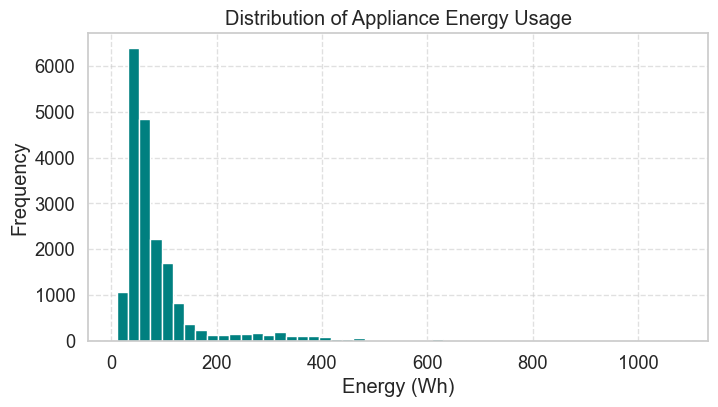

In [225]:
plt.figure(figsize=(8, 4))
plt.hist(df['Appliances'], bins=50,  color='teal')
plt.title("Distribution of Appliance Energy Usage")
plt.xlabel("Energy (Wh)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)

### 🧠 What This Plot Shows

#### Histogram – Distribution of Appliance Energy Usage

- **X-axis**: Appliance energy usage (in Wh)
- **Y-axis**: Frequency (number of records)

This is a histogram - it shows how many records (frequency) fall into each range of energy usage.

### 🔍 Observation:

- Most bars are on the left
    - That means most values are  small - around 0 - 200Wh

- Few bars strech far to the right
    - That means some values are very big -  400, 600, even above  1000Wh
    -  These are r are but exist.
    - These big values(outliers) may negatively affect modeling if not handled.
- This suggests we should consider **outlier treatment** or **log transformation** during preprocessing.

#### 🔍 Why Does It Matter?
##### 🔺 The Problem:
These big values (outliers) can confuse machine learning models.

Models may think they are more important than they really are.

#### ✅ What Can You Do?
##### 🔧 Option 1: Outlier Detection
You can identify and handle very large values, either:

    - Drop them (if they’re errors)

    - Cap them (limit max value to a fixed number)

    - Treat them separately

##### 🔧 Option 2: Log Transformation

## Scatter Plots of Key Features vs Target

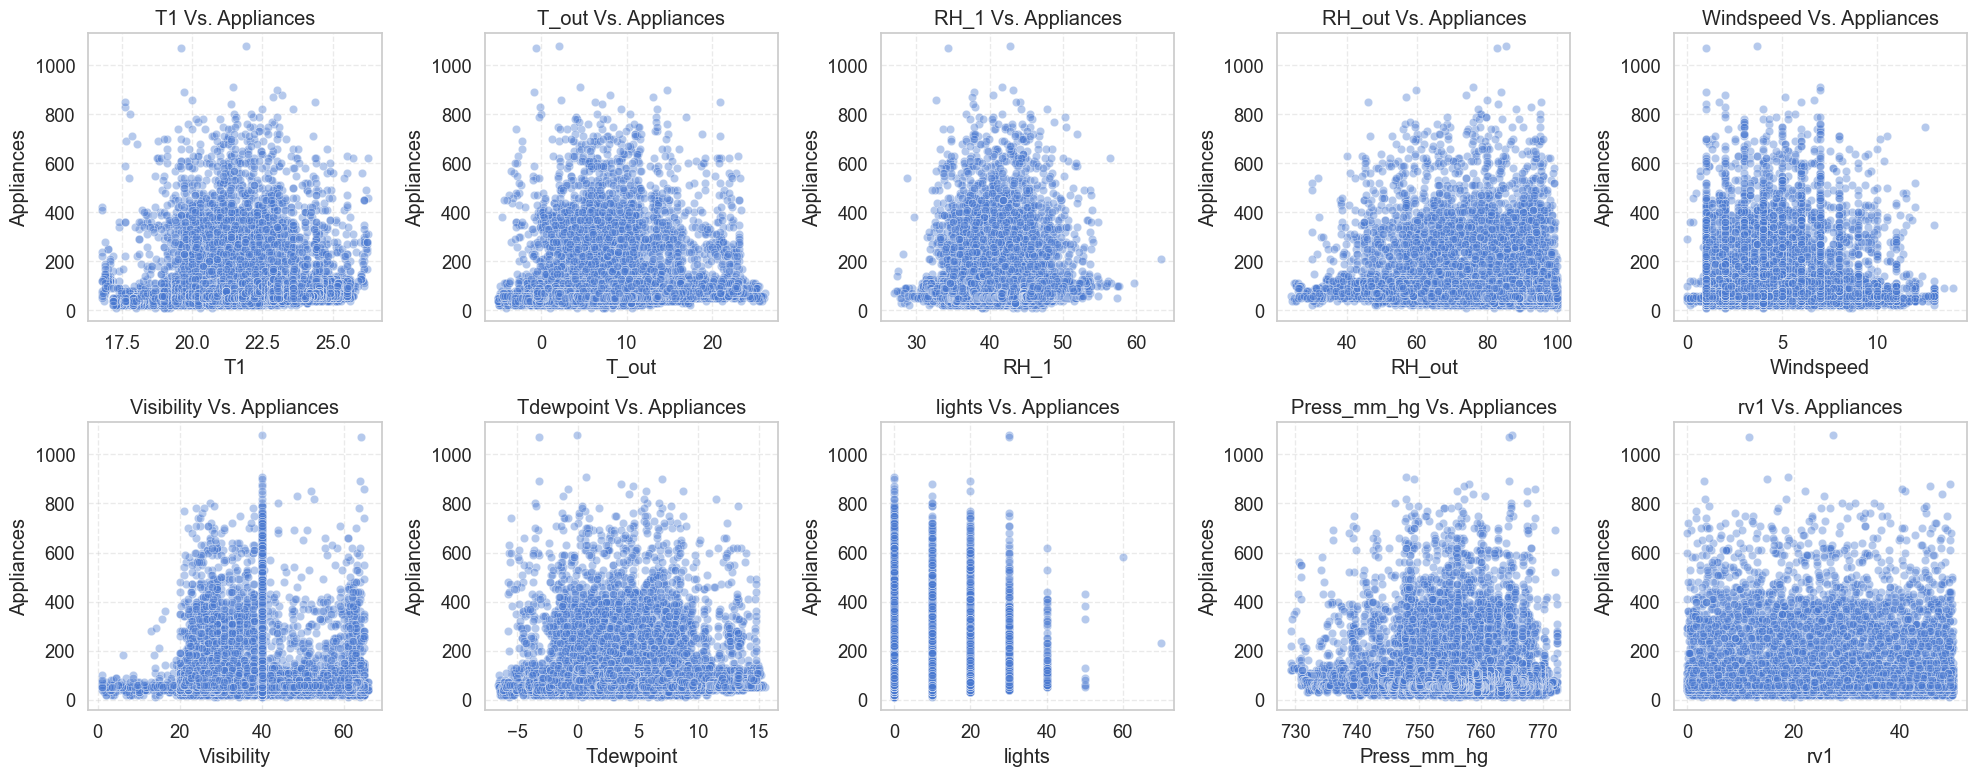

In [226]:
# You can repeat this for several key features
key_features = ['T1', 'T_out', 'RH_1', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'lights', 'Press_mm_hg', 'rv1']

# Create 2 rows and 5 columns of subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten() # Make it easy to index all the 10 axes

for i, feature in enumerate(key_features):
    # Create scatter plot for each feature vs Appliances in it's own subplot
    sns.scatterplot(x=df[feature], y=df['Appliances'], alpha=0.4, ax=axes[i])
    axes[i].set_title(f"{feature} Vs. Appliances")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Appliances")
    axes[i].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout() # Prevents labels from overlapping

### 🧠 What This Plot Shows

### Scatter Plots – Selected Features vs Appliance Usage

These plots visualize the relationship between individual features and energy usage. Non-linear or weak relationships may indicate the need for transformation or removal.

### 🔍  Observations:

The scatter plots show the relationship between key environmental features and appliance energy usage.

For most features (temperature, humidity, windspeed, visibility, etc.), the points are widely scattered without a strong pattern, indicating that no single feature alone can strongly predict appliance energy usage.

The lights feature shows vertical bands, reflecting its discrete nature (number of lights on). There is a weak positive association between the number of lights on and total appliance usage.

These patterns suggest that energy usage depends on the combination of many features (and possibly their interactions or past values), rather than any single variable alone.

The lack of strong simple relationships supports the need for more advanced modeling (deep learning, feature engineering) to capture the complex drivers of appliance energy usage.

# 📊 Step 3: Outlier Detection and Treatment

**Visual Detection (Box Plot)**

In the previous Exploratory Data Analysis (EDA), outliers were observed in the Appliances column using box plots.
These plots showed several data points lying far outside the “whiskers,” indicating unusually high or low energy usage compared to the rest of the data.

## Identify outliers using statistical methods 

##### Check 1st and 99th Percentile Values
We first check the 1st and 99th percentiles to understand the extreme low and high values in the dataset.

In [227]:
# See actual 1st and 99th percentile values in data
print("1st percentile:", df['Appliances'].quantile(0.01))
print("99th percentile:", df['Appliances'].quantile(0.99))

1st percentile: 20.0
99th percentile: 576.5999999999985


These values are useful for understanding the range of most "normal" data, and can be used to cap outliers if desired.

**1. Z-Score Method**

The Z-score method identifies outliers based on their distance from the mean, measured in standard deviations.
Any value with a Z-score greater than 3 or less than -3 is considered an outlier.

**Observation:**

Using the Z-score method, we detected that [your_number_here] outliers exist in the Appliances column. These are extremely rare and extreme values, far from the average energy usage.

In [228]:
# Calculate Z-scores for 'Appliances'
mean = df['Appliances'].mean()
std = df['Appliances'].std()
z_scores = (df['Appliances'] - mean) / std

# Catch outliers: where absolute Z-score > 3
outliers_z = df[np.abs(z_scores) > 3]

print(f"Number of Z-score outliers: {len(outliers_z)}")
print("Sample Z-score outliers:")
print(outliers_z['Appliances'].head())

Number of Z-score outliers: 540
Sample Z-score outliers:
date
2016-01-11 18:50:00    580
2016-01-11 19:00:00    430
2016-01-12 10:10:00    500
2016-01-12 10:20:00    450
2016-01-13 20:20:00    420
Name: Appliances, dtype: int64


**2. IQR (Interquartile Range) Method**

The IQR method finds outliers based on the “middle 50%” of the data.
Any value lower than Q1 – 1.5 × IQR or higher than Q3 + 1.5 × IQR is considered an outlier.

**Observation:**

The IQR method detected [your_number_here] outliers, including both moderate and extreme values. This method is more suitable for skewed, real-world energy data.

**Method Choice**

Since the energy usage data is skewed (not a perfect bell curve), the IQR method is preferred for detecting and treating outliers.
In the next step, outlier values will be capped at the IQR bounds to reduce their influence on modeling.

In [229]:
Q1 = df['Appliances'].quantile(0.25)
Q3 = df['Appliances'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Catch  outliers
outliers_iqr = df[(df['Appliances'] < lower_bound) | (df['Appliances'] > upper_bound)]

print(f"Number of IQR outliers: {len(outliers_iqr)}")
print("Sample IQR outliers:")
print(outliers_iqr['Appliances'].head())

Number of IQR outliers: 2138
Sample IQR outliers:
date
2016-01-11 18:40:00    230
2016-01-11 18:50:00    580
2016-01-11 19:00:00    430
2016-01-11 19:10:00    250
2016-01-11 20:30:00    190
Name: Appliances, dtype: int64
